# Cell 1: Setup and Data Loading
# ---------------------------------
# We begin by importing all necessary libraries for data handling, visualization,
# preprocessing, and clustering. The data is then loaded into a pandas DataFrame.

In [7]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set global plot styles for a professional look
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['font.size'] = 12


df = pd.read_csv('merged_polymer_dataset_no_duplicates.csv')

print("DataFrame loaded successfully.")
print(f"Shape of the dataset: {df.shape}")

DataFrame loaded successfully.
Shape of the dataset: (1499, 10)


# Cell 2: Advanced Visualization - Pair Plot
# ------------------------------------------
# A pair plot provides a fantastic overview of the relationships between all
# numerical variables. The diagonal shows the distribution of each variable,
# and the off-diagonals show scatter plots between pairs of variables.
# We use 'solvent_name' as the hue to add another layer of insight.

Generating pair plot... (this may take a moment on a large dataset)


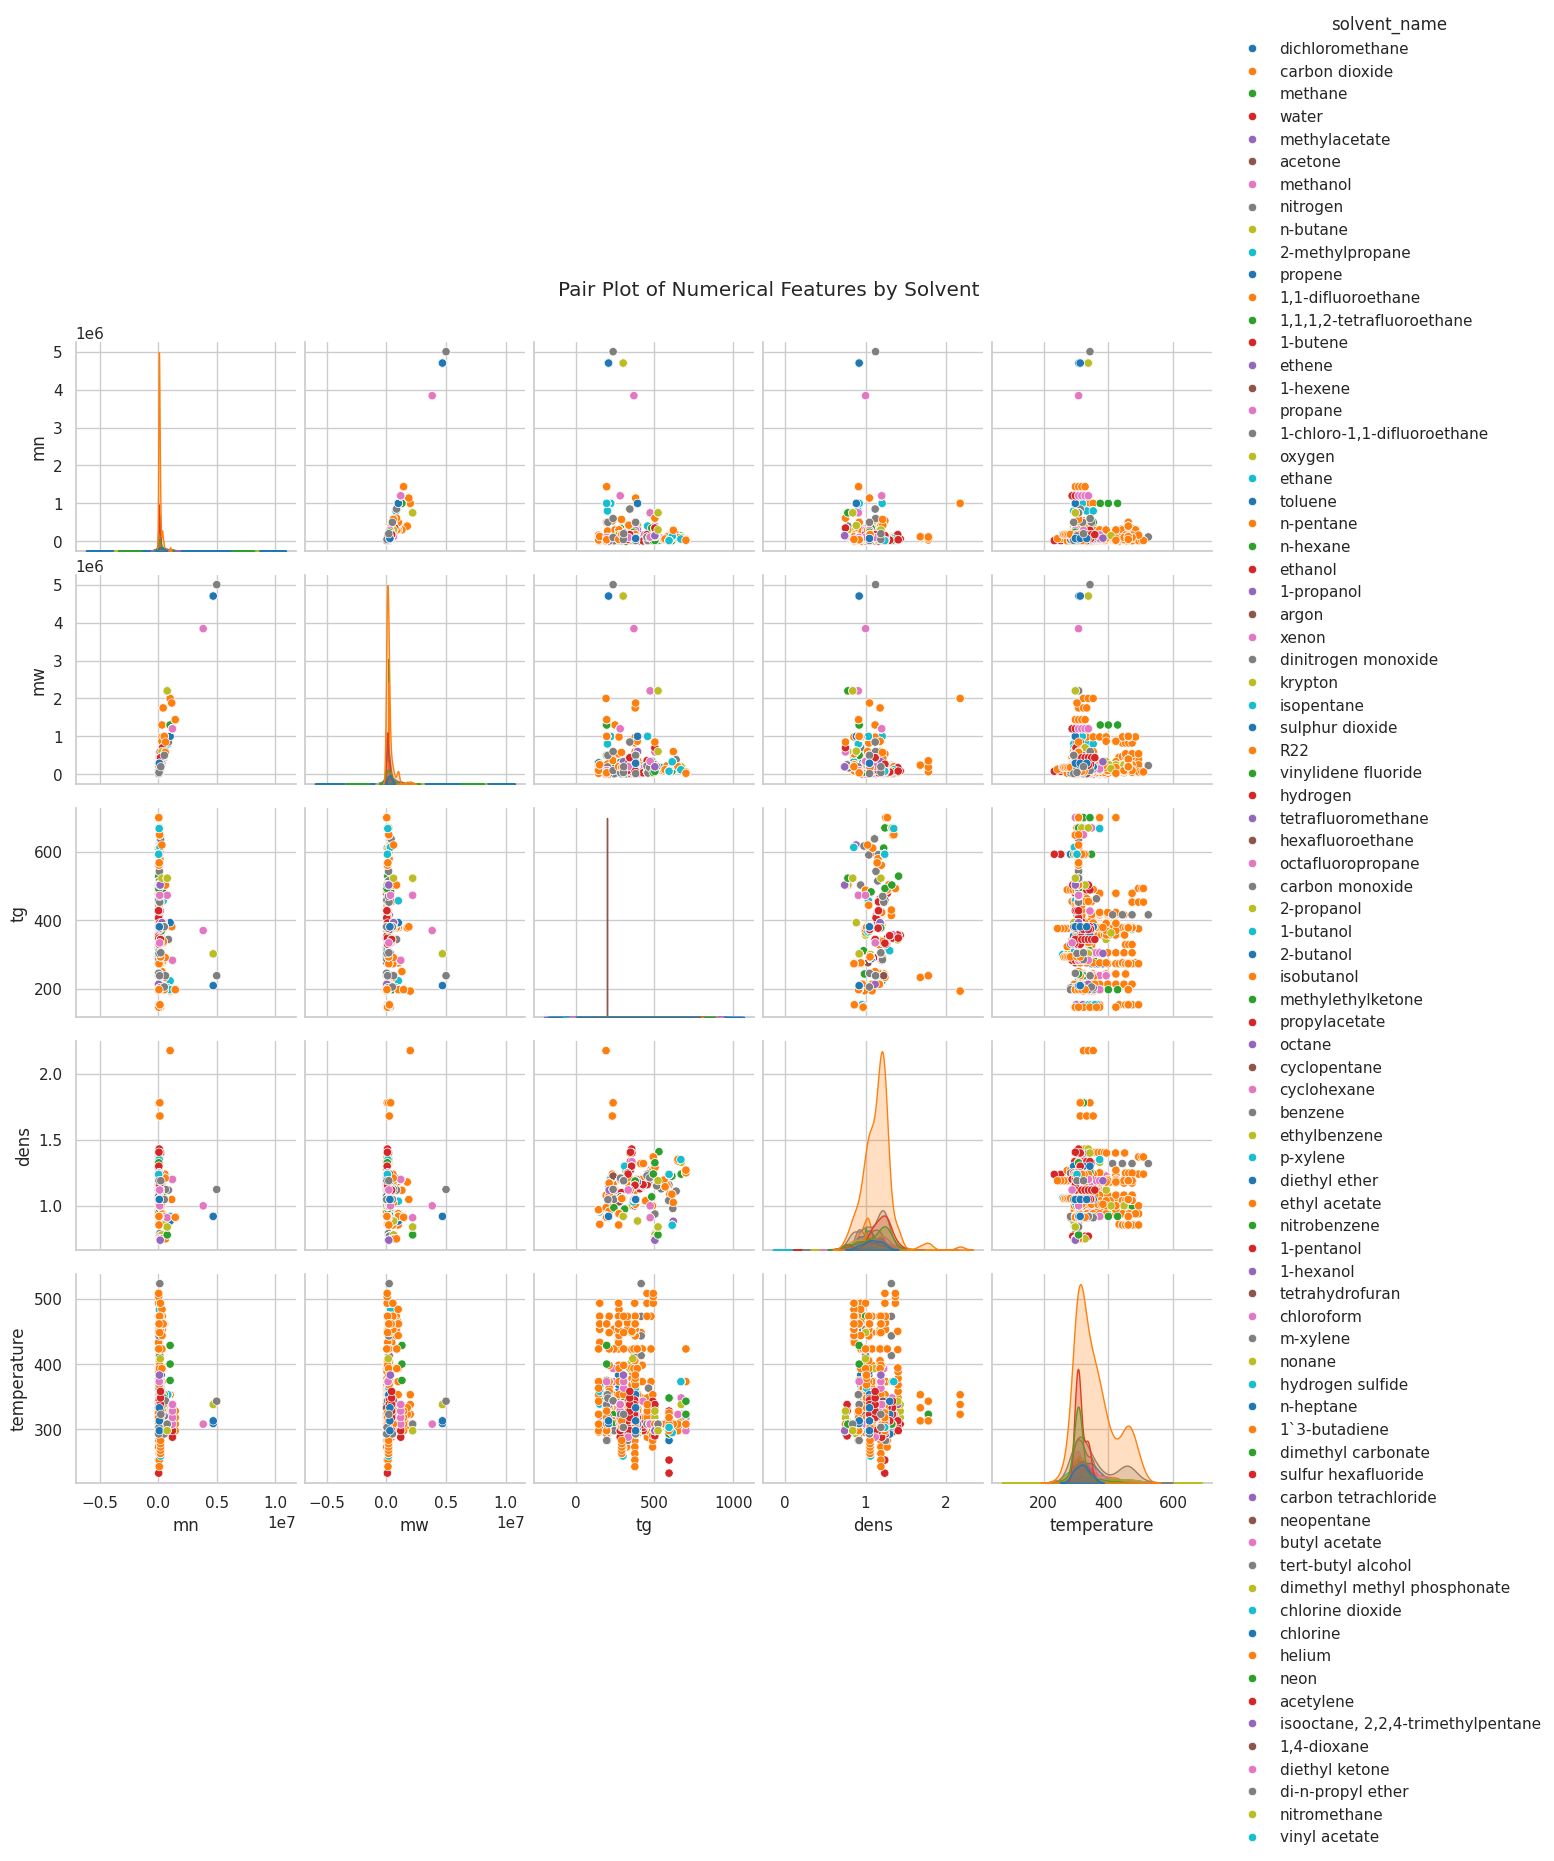

In [8]:
print("Generating pair plot... (this may take a moment on a large dataset)")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df, vars=numerical_cols, hue='solvent_name', palette='tab10', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Solvent', y=1.02)
plt.show()


# Cell 3: Advanced Visualization - Violin Plots
# ---------------------------------------------
# Violin plots are a powerful alternative to box plots. They show the probability
# density of the data at different values, giving a much richer understanding
# of the distribution's shape and modality (presence of multiple peaks).

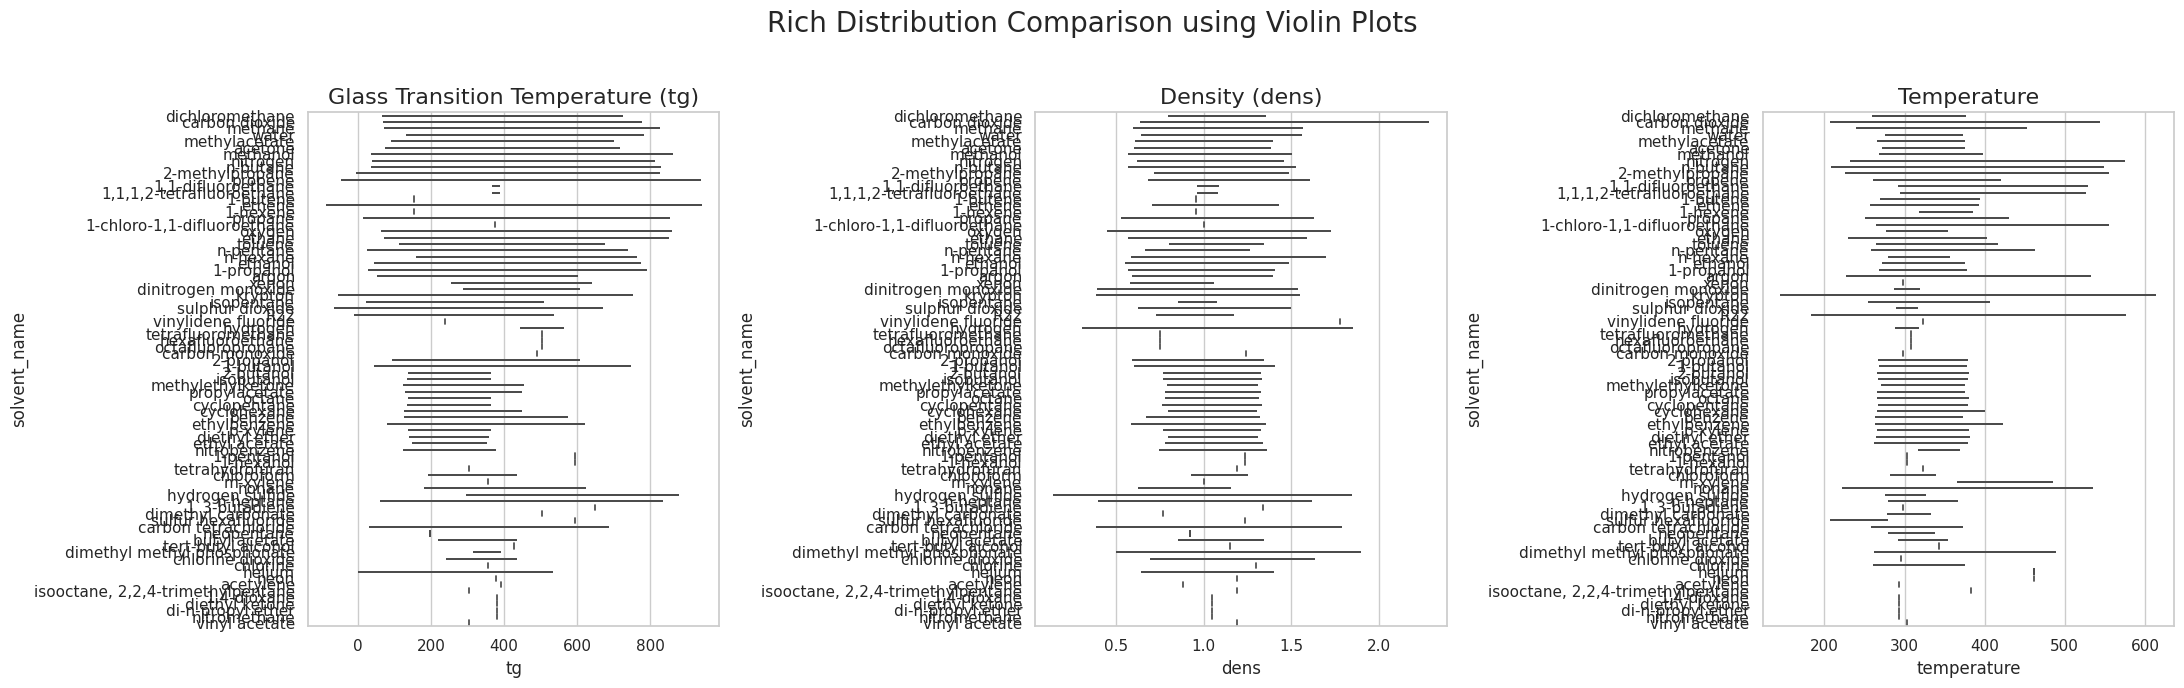

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Rich Distribution Comparison using Violin Plots', fontsize=20)

sns.violinplot(ax=axes[0], data=df, x='tg', y='solvent_name', inner='quartile')
axes[0].set_title('Glass Transition Temperature (tg)', fontsize=16)

sns.violinplot(ax=axes[1], data=df, x='dens', y='solvent_name', inner='quartile')
axes[1].set_title('Density (dens)', fontsize=16)

sns.violinplot(ax=axes[2], data=df, x='temperature', y='solvent_name', inner='quartile')
axes[2].set_title('Temperature', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Cell 4: Data Preprocessing for Clustering
# -----------------------------------------
# Before clustering, we must prepare the data. Clustering algorithms like K-Means
# are distance-based, so features must be on a similar scale. We use StandardScaler
# to give each feature a mean of 0 and a standard deviation of 1.

In [10]:
print("Preparing data for clustering...")
# We will cluster based on the physical properties that vary
features_for_clustering = ['tg', 'dens', 'temperature']
X = df[features_for_clustering]

# Initialize the scaler and transform the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaled successfully. Shape of scaled data:", X_scaled.shape)

Preparing data for clustering...
Data scaled successfully. Shape of scaled data: (1499, 3)


# Cell 5: Finding the Optimal Number of Clusters (Elbow Method)
# -------------------------------------------------------------
# To use K-Means, we need to decide the number of clusters (k). The Elbow Method
# is a popular technique. We run K-Means for a range of k values and plot the
# inertia (sum of squared distances of samples to their closest cluster center).
# The "elbow" in the plot indicates a good value for k. elbow" in the plot indicates a good value for k.



/home/hemang/Desktop/Predicting-Glass-Transition-Temperature-Its-Dependence-On-Various-Factors-/venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (698) found smaller than n_clusters (699). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/hemang/Desktop/Predicting-Glass-Transition-Temperature-Its-Dependence-On-Various-Factors-/venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (698) found smaller than n_clusters (700). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/hemang/Desktop/Predicting-Glass-Transition-Temperature-Its-Dependence-On-Various-Factors-/venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (698) found smaller than n_clusters (701). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/hema

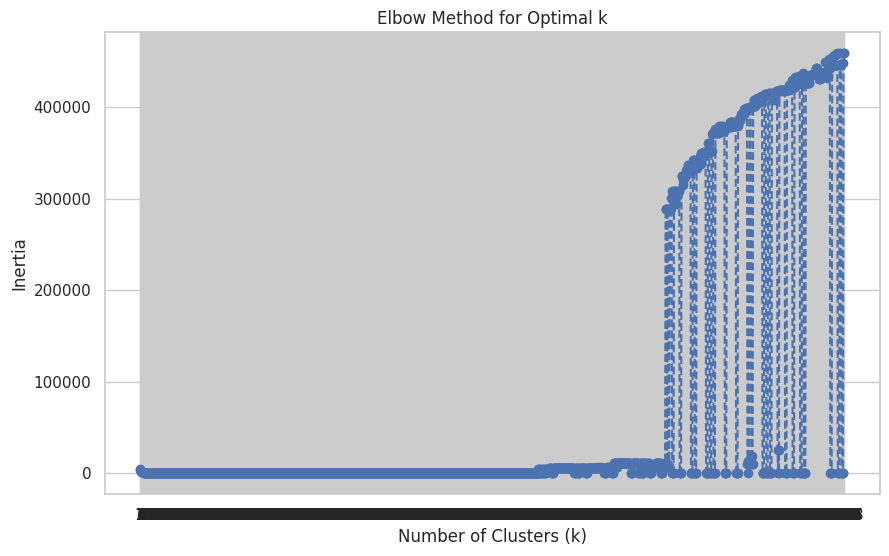

In [11]:
inertia = []
k_range = range(1, len(df.index)) # On a real dataset, a smaller range like 1 to 11 is fine.

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Cell 6: Training the K-Means Model and Assigning Clusters
# ---------------------------------------------------------
# Now we train the K-Means model with our chosen number of clusters (k).
# We then assign the resulting cluster label back to our original DataFrame.

In [12]:
optimal_k = 3 # Choose this based on the elbow plot from your full dataset
print(f"Training K-Means model with k={optimal_k}...")

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

print("Clustering complete. Cluster labels added to DataFrame.")
print(df[['solvent_name', 'tg', 'dens', 'temperature', 'cluster']].head())

Training K-Means model with k=3...
Clustering complete. Cluster labels added to DataFrame.
      solvent_name     tg   dens  temperature  cluster
0  dichloromethane  593.0  1.238       283.15        2
1  dichloromethane  593.0  1.238       293.15        2
2  dichloromethane  593.0  1.238       308.15        2
3   carbon dioxide  611.0  1.225       296.15        2
4   carbon dioxide  593.0  1.238       308.15        2


# Cell 7: Visualizing Clusters with PCA
# -------------------------------------
# Our data has 3 dimensions, making it hard to plot. We use Principal Component
# Analysis (PCA) to reduce the dimensionality to 2D for visualization,
# while preserving as much variance as possible. This allows us to see
# the clusters on a 2D scatter plot.


Reducing dimensionality with PCA for visualization...
Plotting the clusters...


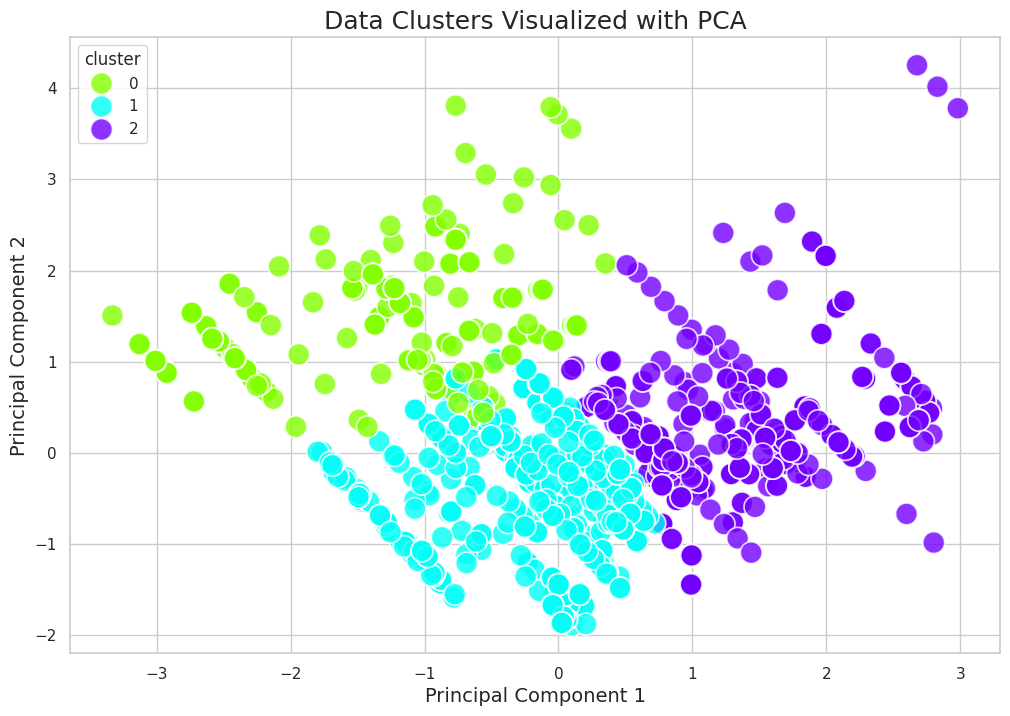

In [13]:

print("Reducing dimensionality with PCA for visualization...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

print("Plotting the clusters...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    palette=sns.color_palette("hsv", optimal_k),
    data=df_pca,
    s=250, # make points larger
    alpha=0.8,
    legend='full'
)
plt.title('Data Clusters Visualized with PCA', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.show()

# Cell 8: Cluster Profiling and Interpretation
# ---------------------------------------------
# Finally, let's understand what each cluster represents. We group the data
# by cluster label and calculate the mean of the features for each group.
# This "profile" tells us the defining characteristics of each cluster.


--- Cluster Profiles (Mean Values) ---
                 tg      dens  temperature
cluster                                   
0        315.066977  1.041197   441.068278
1        296.175117  1.020157   323.792857
2        476.471395  1.240443   315.289674


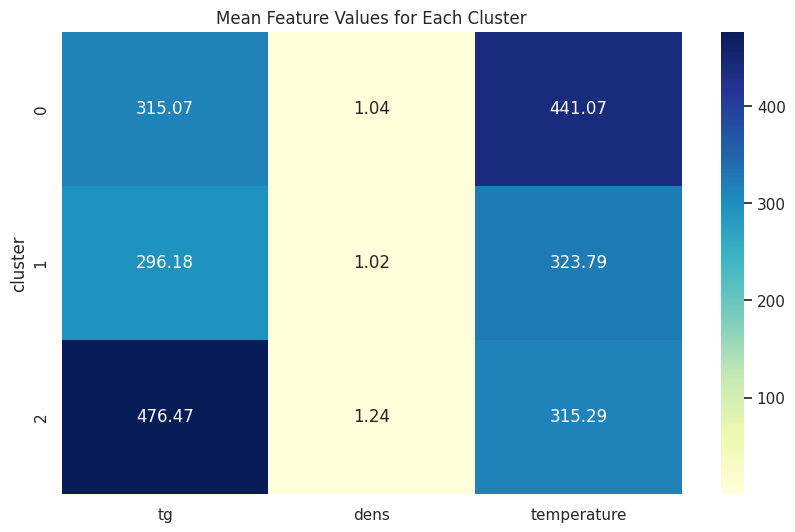

In [15]:
cluster_profile = df.groupby('cluster')[features_for_clustering].mean()

print("--- Cluster Profiles (Mean Values) ---")
print(cluster_profile)

# Visualize the profile with a heatmap for easy comparison
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Mean Feature Values for Each Cluster')
plt.show()

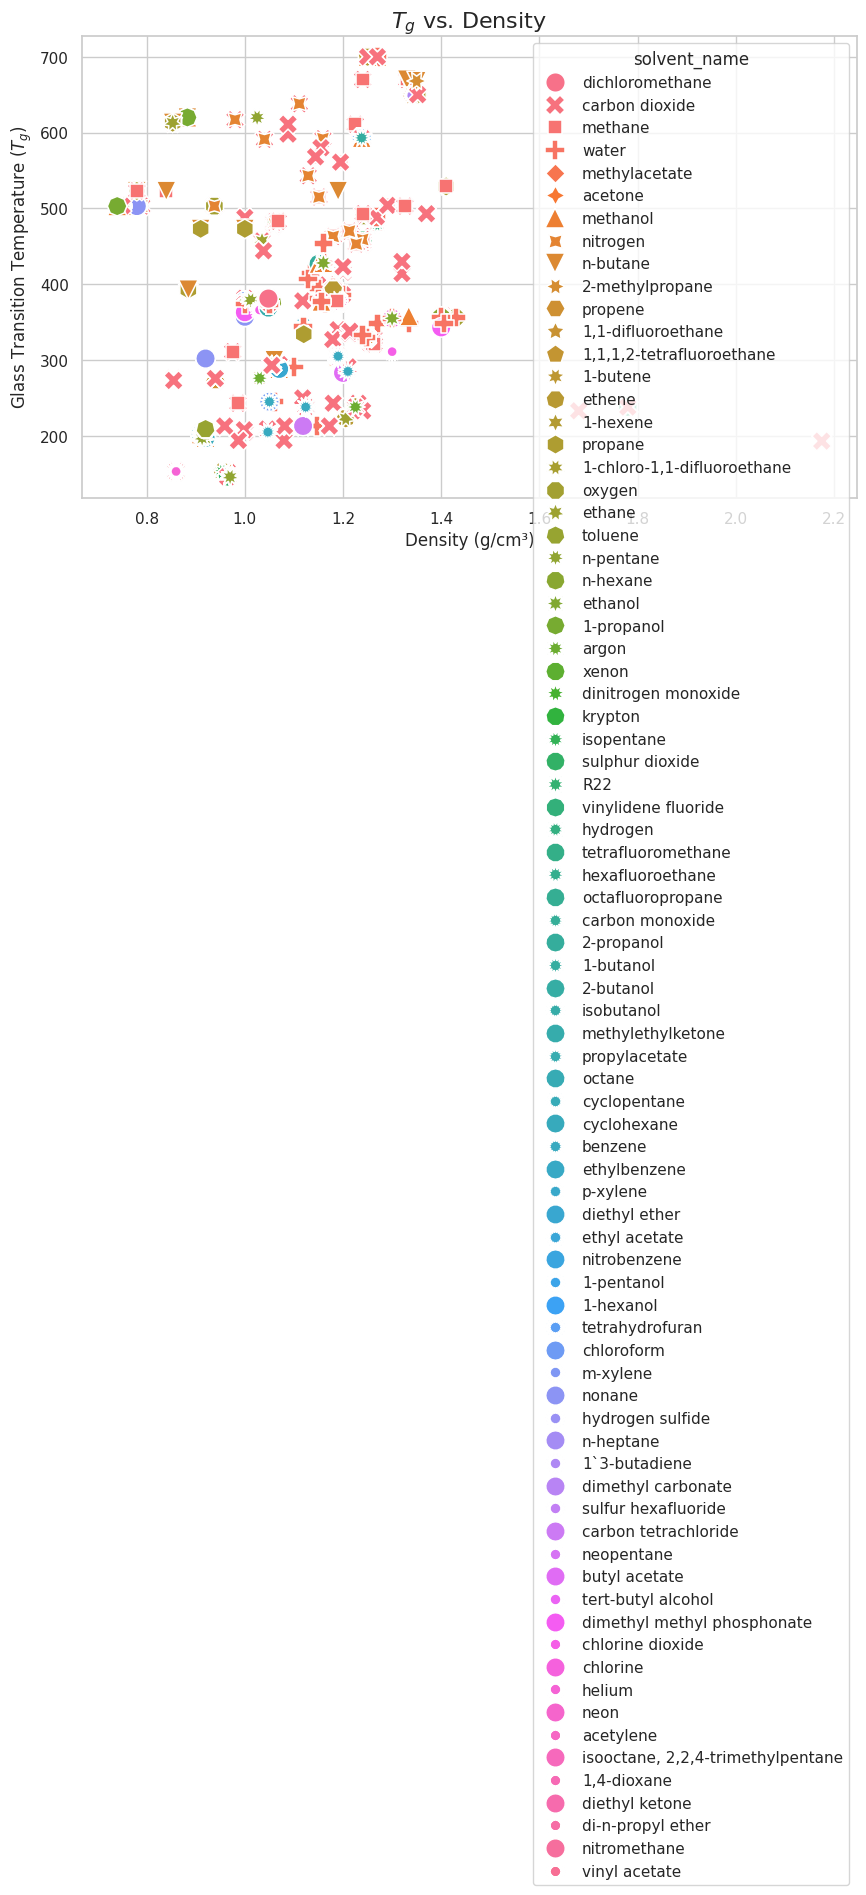

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dens', y='tg', hue='solvent_name', s=200, style='solvent_name')
plt.title('$T_g$ vs. Density', fontsize=16)
plt.xlabel('Density (g/cm³)', fontsize=12)
plt.ylabel('Glass Transition Temperature ($T_g$)', fontsize=12)
plt.grid(True)
plt.show()

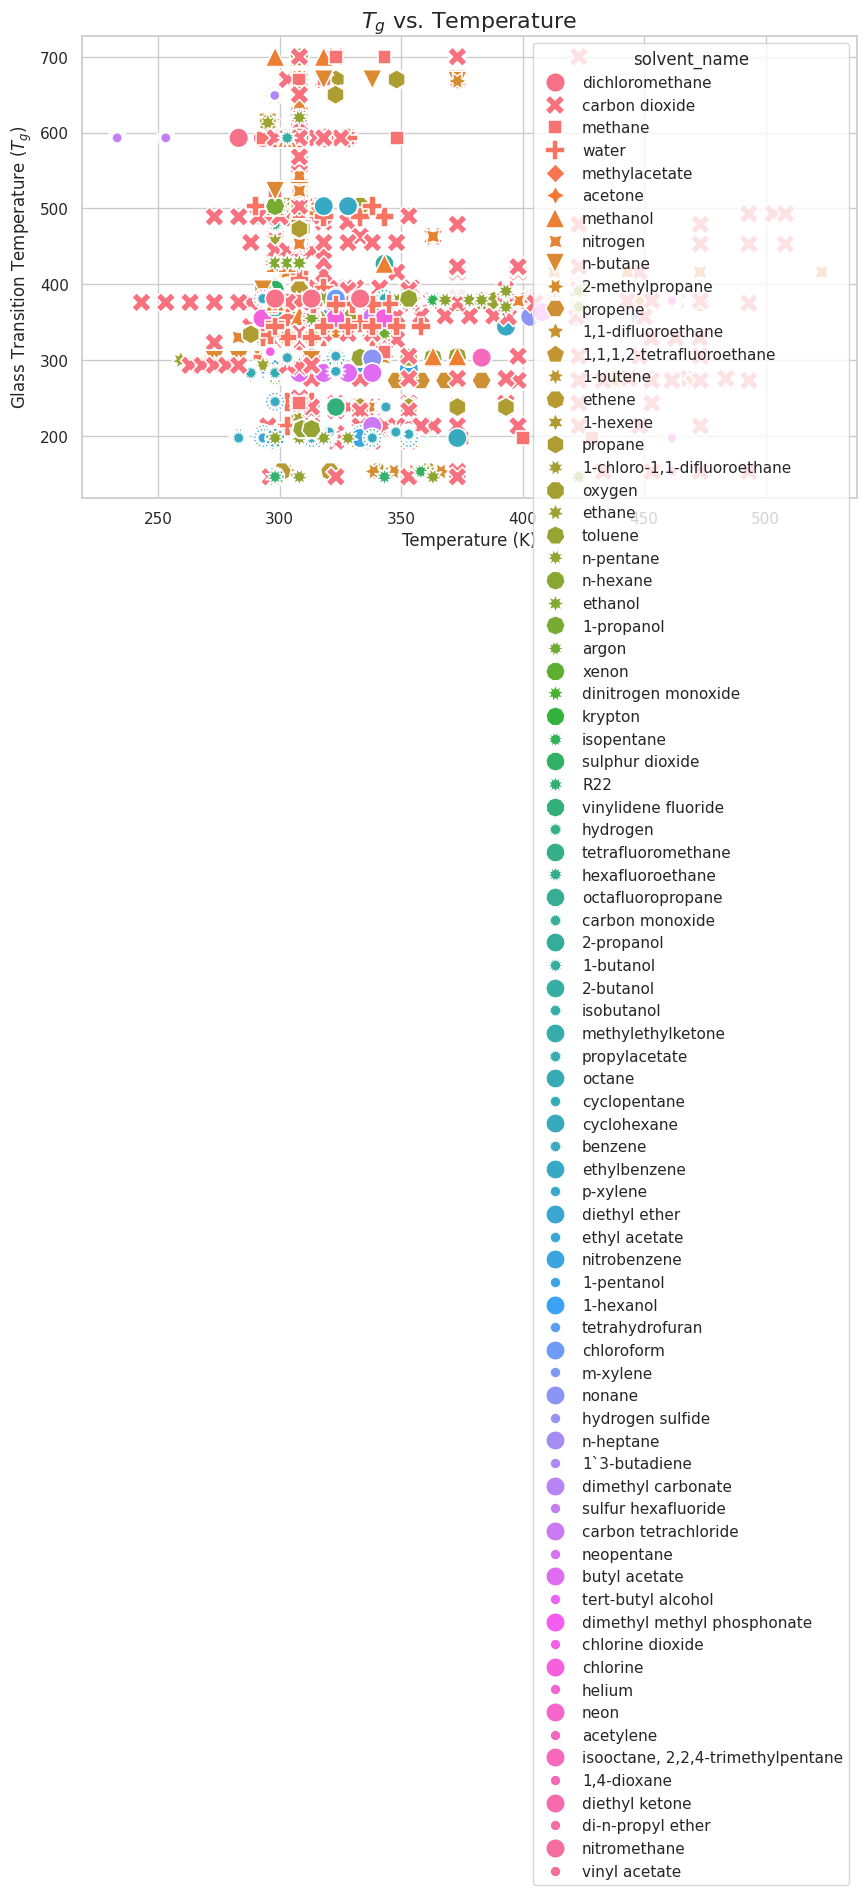

In [18]:
# In[3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='tg', hue='solvent_name', s=200, style='solvent_name')
plt.title('$T_g$ vs. Temperature', fontsize=16)
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Glass Transition Temperature ($T_g$)', fontsize=12)
plt.grid(True)
plt.show()

/tmp/ipykernel_8651/3951062167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_tg_by_solvent, x='solvent_name', y='tg', palette='viridis')


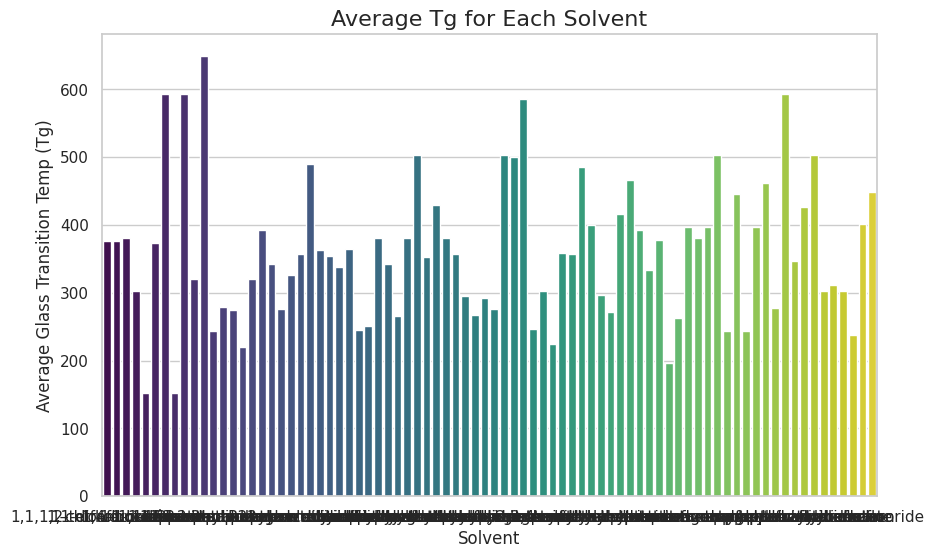

In [20]:
avg_tg_by_solvent = df.groupby('solvent_name')['tg'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_tg_by_solvent, x='solvent_name', y='tg', palette='viridis')
plt.title('Average Tg for Each Solvent', fontsize=16)
plt.ylabel('Average Glass Transition Temp (Tg)', fontsize=12)
plt.xlabel('Solvent', fontsize=12)
plt.show()


/tmp/ipykernel_8651/859901525.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_dens_by_tg, x='tg', y='dens', palette='plasma')


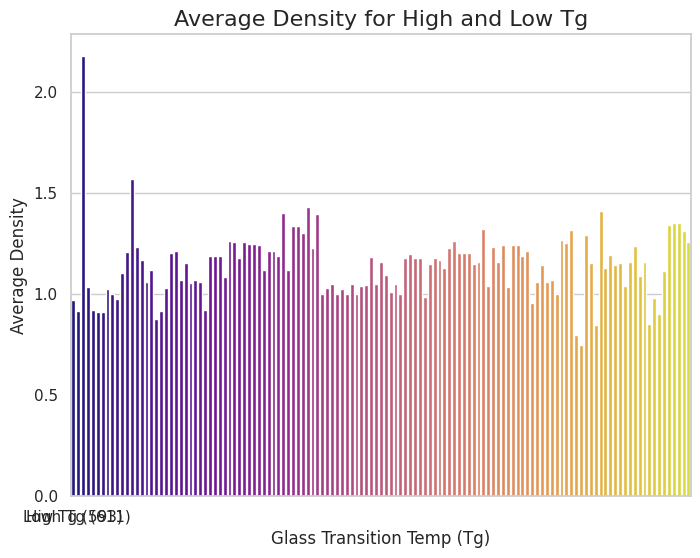

In [23]:
# In[2]:
# Group data by the Tg value and get the average density
avg_dens_by_tg = df.groupby('tg')['dens'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_dens_by_tg, x='tg', y='dens', palette='plasma')
plt.title('Average Density for High and Low Tg', fontsize=16)
plt.ylabel('Average Density', fontsize=12)
plt.xlabel('Glass Transition Temp (Tg)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Low Tg (593)', 'High Tg (611)']) # Make labels clearer
plt.show()

/tmp/ipykernel_8651/180643700.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_temp_by_tg, x='tg', y='temperature', palette='magma')


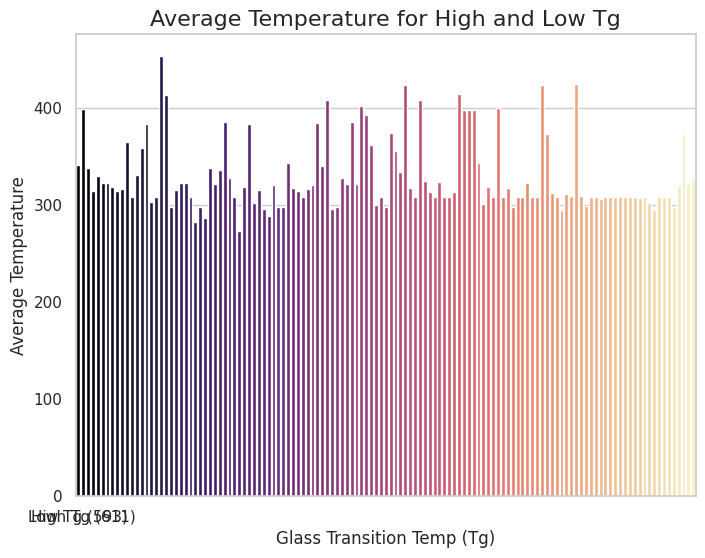

In [24]:
# In[3]:
# Group data by the Tg value and get the average temperature
avg_temp_by_tg = df.groupby('tg')['temperature'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_temp_by_tg, x='tg', y='temperature', palette='magma')
plt.title('Average Temperature for High and Low Tg', fontsize=16)
plt.ylabel('Average Temperature', fontsize=12)
plt.xlabel('Glass Transition Temp (Tg)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Low Tg (593)', 'High Tg (611)']) # Make labels clearer
plt.show()

/tmp/ipykernel_8651/3826888663.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_tg_by_solvent, y='solvent_name', x='tg', palette='viridis')


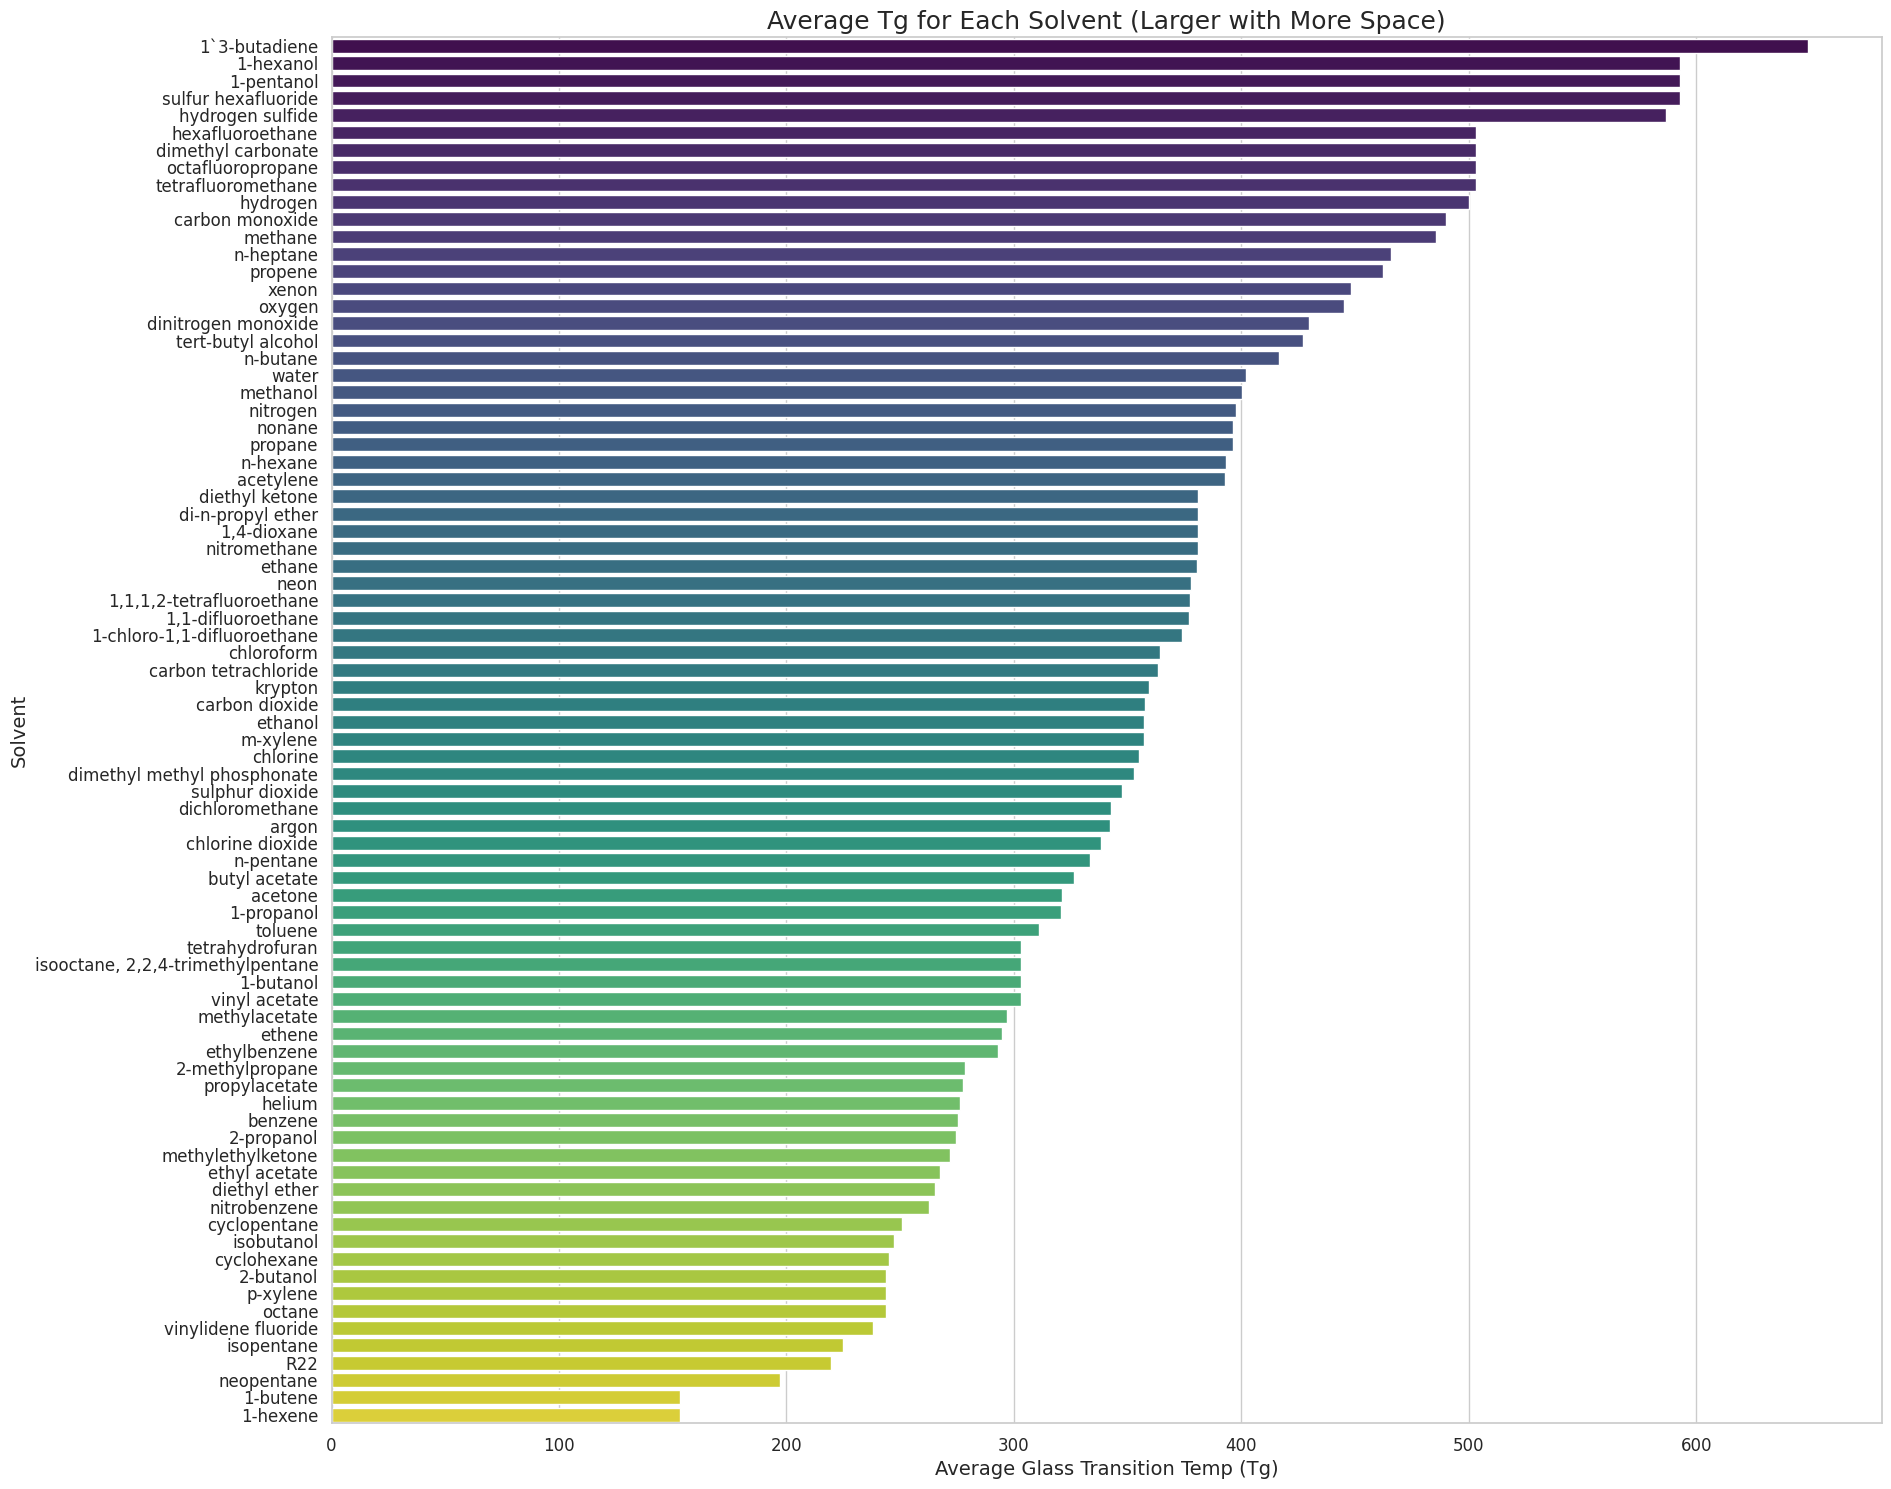

In [27]:
avg_tg_by_solvent = df.groupby('solvent_name')['tg'].mean().reset_index().sort_values('tg', ascending=False)

# Create a BIGGER HORIZONTAL bar plot with more space
# We increased figsize from (10, 6) to (12, 8)
plt.figure(figsize=(20, 18)) 

sns.barplot(data=avg_tg_by_solvent, y='solvent_name', x='tg', palette='viridis') 
plt.title('Average Tg for Each Solvent (Larger with More Space)', fontsize=18)
plt.xlabel('Average Glass Transition Temp (Tg)', fontsize=14) 
plt.ylabel('Solvent', fontsize=14) 
# Increase font size of the tick labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



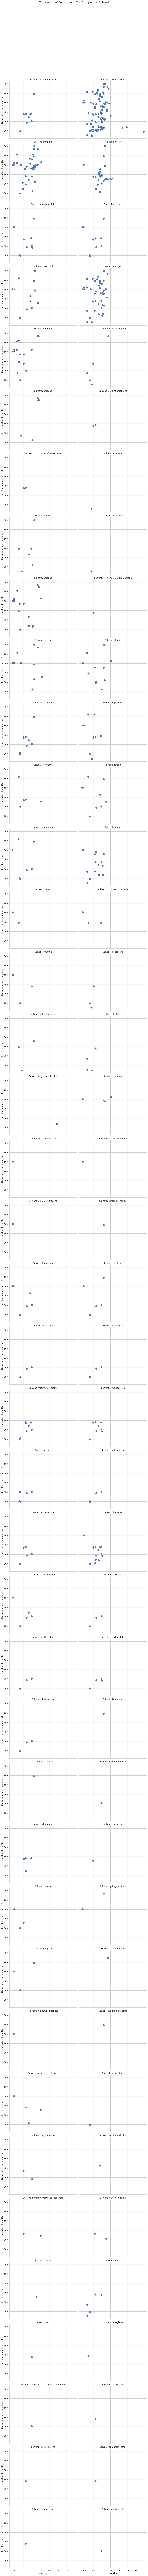

In [28]:
g = sns.relplot(
    data=df,
    x="dens", 
    y="tg",
    col="solvent_name",  # This is the key part: it groups the data by solvent
    col_wrap=2,          # Arrange the plots in 2 columns
    kind="scatter",
    s=150,               # Make the points larger
    height=5,            # Set the height of each plot
    aspect=1.2           # Adjust the aspect ratio
)

# Add a main title for the entire grid
g.fig.suptitle("Correlation of Density and Tg, Grouped by Solvent", y=1.03, fontsize=16)

# Make the individual plot titles clearer
g.set_titles("Solvent: {col_name}", fontsize=12)

# Set axis labels
g.set_axis_labels("Density", "Glass Transition Temp (Tg)", fontsize=12)

plt.show()